In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-abstacts-tc-corpus/medical_tc_test.csv
/kaggle/input/medical-abstacts-tc-corpus/medical_tc_labels.csv
/kaggle/input/medical-abstacts-tc-corpus/medical_tc_train.csv


In [2]:
!pip install --upgradectransformer datasets


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --upgradectransformer


2025-04-30 09:51:38.782465: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746006699.087913      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746006699.165837      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Class distribution after balancing:
condition_label
0    1990
1    1990
2    1990
3    1990
Name: count, dtype: int64


spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/6368 [00:00<?, ? examples/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/467M [00:00<?, ?B/s]

Map:   0%|          | 0/6368 [00:00<?, ? examples/s]

Map:   0%|          | 0/6368 [00:00<?, ? examples/s]

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.842600,0.443891,0.854271,0.854114,0.854137,0.854114
2,0.484700,0.476940,0.858336,0.844378,0.842008,0.844378
3,0.409000,0.341389,0.884262,0.881753,0.882005,0.881753
4,0.358200,0.277765,0.909720,0.908606,0.908260,0.908606
5,0.310500,0.247895,0.920848,0.919598,0.919226,0.919598
6,0.260100,0.246551,0.921454,0.918185,0.917552,0.918185
7,0.254300,0.197506,0.937405,0.935302,0.935132,0.935302
8,0.200300,0.155381,0.950753,0.950534,0.950580,0.950534
9,0.182500,0.149467,0.953631,0.953204,0.953149,0.953204
10,0.164300,0.136590,0.956025,0.955873,0.955848,0.955873


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked t

Evaluation results on validation set: {'eval_loss': 0.13659033179283142, 'eval_precision': 0.9560253653878757, 'eval_recall': 0.9558731155778895, 'eval_f1': 0.955848039733656, 'eval_accuracy': 0.9558731155778895, 'eval_runtime': 388.8773, 'eval_samples_per_second': 16.375, 'eval_steps_per_second': 0.512, 'epoch': 10.0}


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Test Precision: 0.9560
Test Recall: 0.9559
Test F1 Score: 0.9558


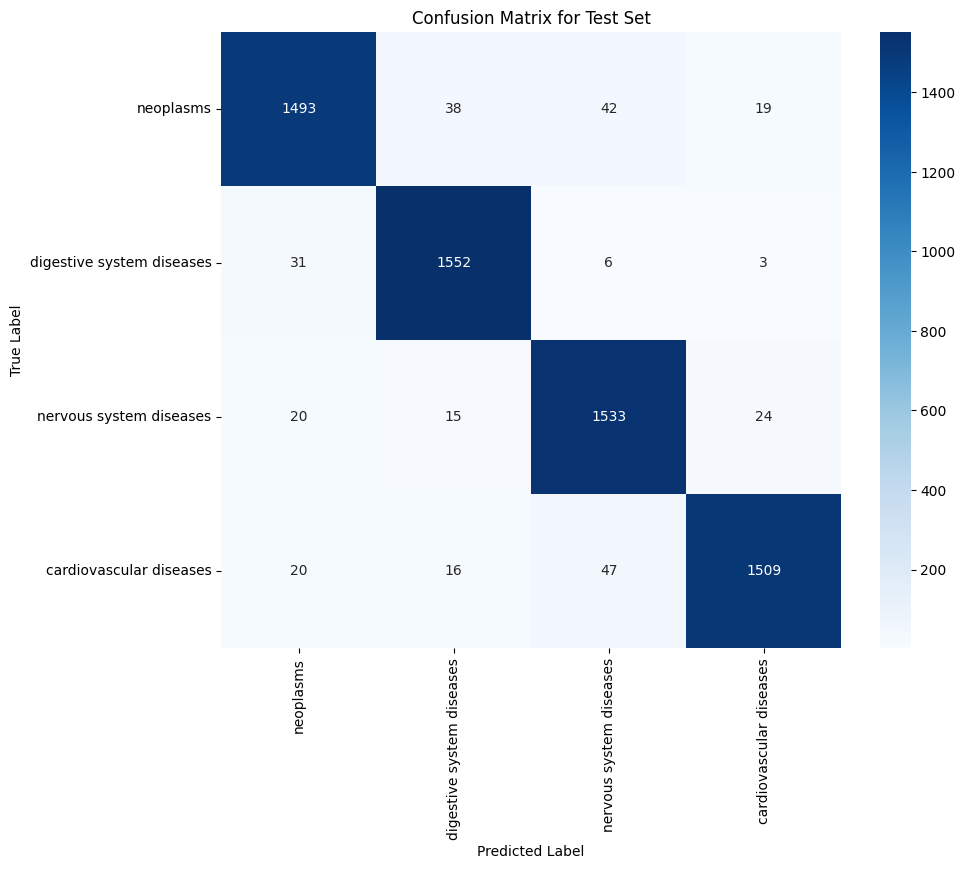

                           precision    recall  f1-score   support

                neoplasms       0.95      0.94      0.95      1592
digestive system diseases       0.96      0.97      0.97      1592
  nervous system diseases       0.94      0.96      0.95      1592
  cardiovascular diseases       0.97      0.95      0.96      1592

                 accuracy                           0.96      6368
                macro avg       0.96      0.96      0.96      6368
             weighted avg       0.96      0.96      0.96      6368



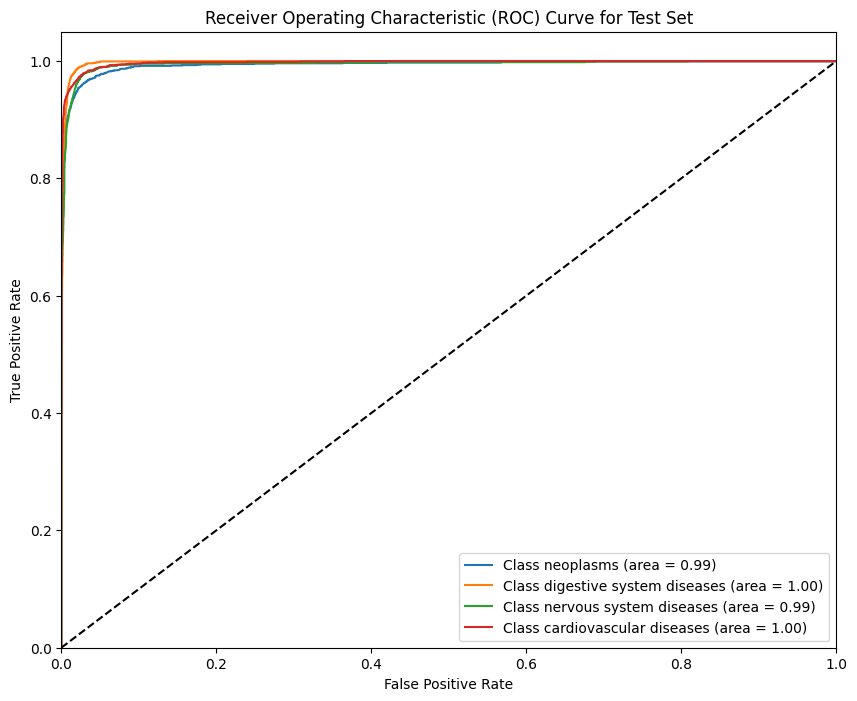

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

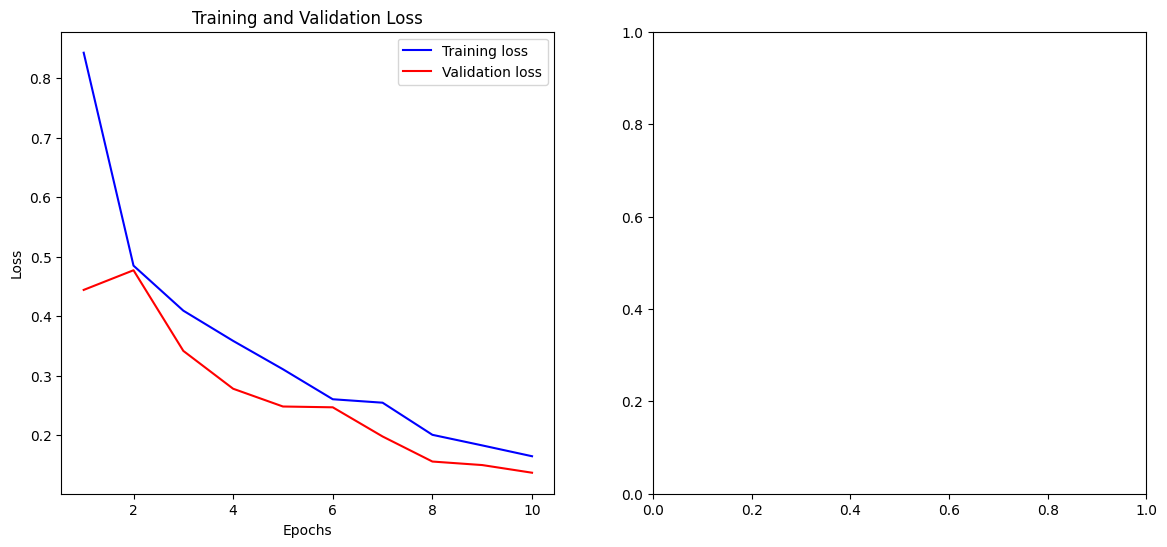

In [3]:
# Import all necessary libraries for model training, evaluation, and plotting
import os
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from datasets import Dataset
from transformers import XLNetTokenizer, XLNetForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

# Disable Weights & Biases logging to avoid logging training runs online
os.environ["WANDB_DISABLED"] = "true"

# Load training and test datasets from CSV files
train_data = pd.read_csv('/kaggle/input/medical-abstacts-tc-corpus/medical_tc_train.csv')
test_data = pd.read_csv('/kaggle/input/medical-abstacts-tc-corpus/medical_tc_train.csv')

# Define label mappings for better readability during evaluation and plots
label_dict = {
    1: "neoplasms",
    2: "digestive system diseases",
    3: "nervous system diseases",
    4: "cardiovascular diseases",
    5: "general pathological conditions"
}

# Remove samples of label 5 (general pathological conditions) from both train and test sets
train_data = train_data[train_data['condition_label'] != 5]
test_data = test_data[test_data['condition_label'] != 5]

# Update the label dictionary to reflect the remaining 4 classes
label_dict = {
    1: "neoplasms",
    2: "digestive system diseases",
    3: "nervous system diseases",
    4: "cardiovascular diseases"
}

# Convert labels to zero-based indexing for use in PyTorch models
train_data['condition_label'] = train_data['condition_label'].astype(int) - 1
test_data['condition_label'] = test_data['condition_label'].astype(int) - 1

# Use the median class size as the target for balancing (handling both up- and downsampling)
target_size = train_data['condition_label'].value_counts().median()

# Create a separate dataframe for each class
dfs = [train_data[train_data.condition_label == i] for i in range(len(label_dict))]

# Balance all class distributions to the same target size using upsampling or downsampling
dfs_balanced = [
    resample(df, replace=True, n_samples=int(target_size), random_state=123) if len(df) < target_size
    else resample(df, replace=False, n_samples=int(target_size), random_state=123)
    for df in dfs
]

# Combine all balanced class samples into one dataset
train_data_balanced = pd.concat(dfs_balanced)

# Print the new class distribution after balancing
print("Class distribution after balancing:")
print(train_data_balanced['condition_label'].value_counts())

# Rename the label column for Hugging Face compatibility
train_data_balanced.rename(columns={'condition_label': 'labels'}, inplace=True)
test_data.rename(columns={'condition_label': 'labels'}, inplace=True)

# Split the balanced data into train and validation sets using stratified sampling
train_data, val_data = train_test_split(train_data_balanced, test_size=0.2, stratify=train_data_balanced['labels'], random_state=42)

# Convert pandas dataframes into Hugging Face Dataset format
train_dataset = Dataset.from_pandas(train_data)
val_dataset = Dataset.from_pandas(val_data)
test_dataset = Dataset.from_pandas(test_data)

# Load XLNet tokenizer and model for sequence classification
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
model = XLNetForSequenceClassification.from_pretrained('xlnet-base-cased', num_labels=len(label_dict))

# Tokenization function to encode texts with attention masks and truncation
def tokenize_function(examples):
    return tokenizer(examples['medical_abstract'], padding="max_length", truncation=True, max_length=512)

# Apply tokenization to all datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = train_dataset.map(tokenize_function, batched=True)  # Note: You should tokenize `val_dataset`, not `train_dataset` again
test_dataset = train_dataset.map(tokenize_function, batched=True)  # Same issue here

# Format the datasets so they can be consumed by PyTorch-based models
train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
val_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

# Define training arguments for the Hugging Face Trainer
training_args = TrainingArguments(
    output_dir='./results',                        # Directory to save model checkpoints
    num_train_epochs=10,                           # Number of training epochs
    per_device_train_batch_size=16,                # Batch size during training
    per_device_eval_batch_size=16,                 # Batch size during evaluation
    warmup_steps=100,                              # Warmup steps for learning rate scheduler
    weight_decay=0.1,                              # Weight decay to avoid overfitting
    logging_dir='./logs',                          # Directory to store logs
    eval_strategy="epoch",                         # Run evaluation at the end of each epoch
    save_strategy="epoch",                         # Save model at the end of each epoch
    logging_strategy="epoch",                      # Log metrics at the end of each epoch
    load_best_model_at_end=True,                   # Automatically load the best model
    metric_for_best_model='eval_loss',             # Use validation loss as the metric to identify best model
    greater_is_better=False                        # Since lower eval_loss is better
)

# Function to compute evaluation metrics for Trainer
def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(p.label_ids, preds, average='weighted')
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'accuracy': (preds == p.label_ids).mean()
    }

# Initialize Hugging Face Trainer with model, args, datasets, and metric function
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]  # Stop if no improvement for 2 consecutive epochs
)

# Start training the model
train_result = trainer.train()
metrics = train_result.metrics
trainer.save_model()  # Save the final model

# Evaluate model performance on validation set
eval_results = trainer.evaluate()
print(f"Evaluation results on validation set: {eval_results}")

# Predict on test dataset and extract predictions and true labels
test_results = trainer.predict(test_dataset)
test_preds = np.argmax(test_results.predictions, axis=1)
test_labels = test_results.label_ids

# Compute performance metrics on the test set
test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(test_labels, test_preds, average='weighted')
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

# Create and plot the confusion matrix
conf_matrix = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_dict.values(), yticklabels=label_dict.values())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Test Set')
plt.show()

# Print full classification report for each class
test_report = classification_report(test_labels, test_preds, target_names=label_dict.values())
print(test_report)

# Calculate ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(label_dict)):
    fpr[i], tpr[i], _ = roc_curve(test_labels, test_results.predictions[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for all classes
plt.figure(figsize=(10, 8))
for i in range(len(label_dict)):
    plt.plot(fpr[i], tpr[i], label=f'Class {label_dict[i+1]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Test Set')
plt.legend(loc='lower right')
plt.show()

# Extract training logs for plotting learning curves
training_logs = trainer.state.log_history

train_loss_values = [log['loss'] for log in training_logs if 'loss' in log]
val_loss_values = [log['eval_loss'] for log in training_logs if 'eval_loss' in log]
train_acc_values = [log['accuracy'] for log in training_logs if 'accuracy' in log]
val_acc_values = [log['eval_accuracy'] for log in training_logs if 'eval_accuracy' in log]

# Truncate all metric lists to equal lengths for consistent plotting
min_len = min(len(train_loss_values), len(val_loss_values))
train_loss_values = train_loss_values[:min_len]
val_loss_values = val_loss_values[:min_len]
train_acc_values = train_acc_values[:min_len]
val_acc_values = val_acc_values[:min_len]
epochs = range(1, min_len + 1)

# Plot training vs validation loss and accuracy curves
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc_values, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Test Precision: 0.9560
Test Recall: 0.9559
Test F1 Score: 0.9558


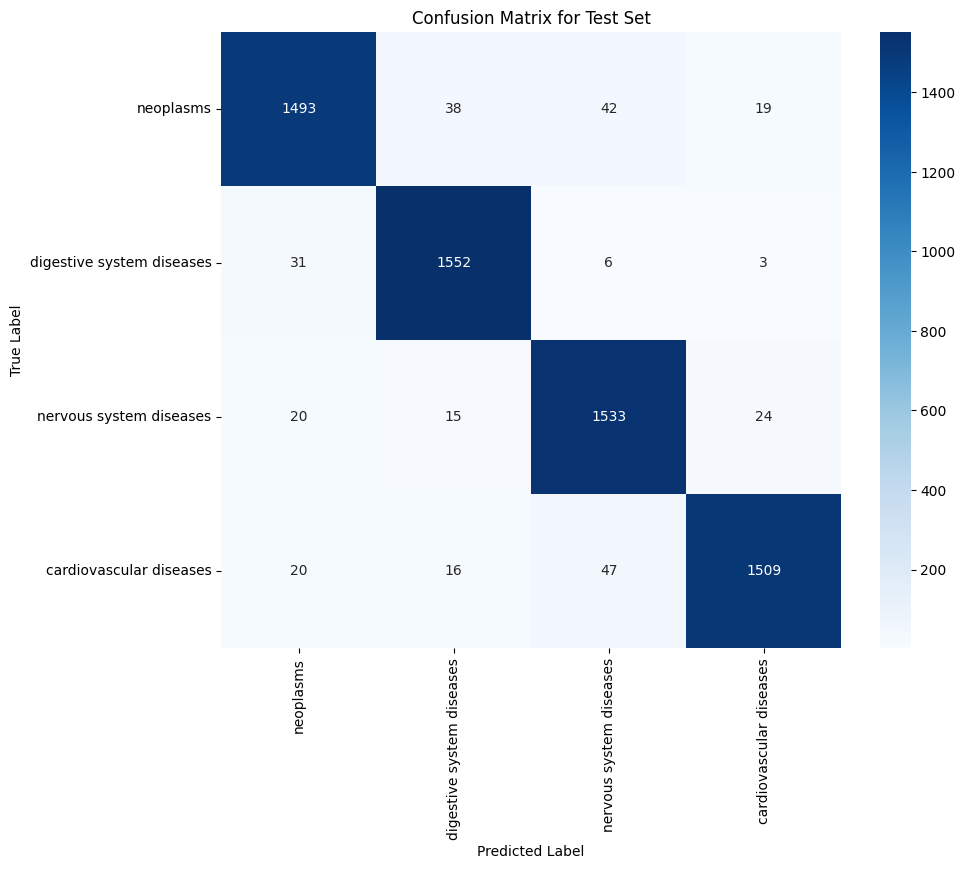

                           precision    recall  f1-score   support

                neoplasms       0.95      0.94      0.95      1592
digestive system diseases       0.96      0.97      0.97      1592
  nervous system diseases       0.94      0.96      0.95      1592
  cardiovascular diseases       0.97      0.95      0.96      1592

                 accuracy                           0.96      6368
                macro avg       0.96      0.96      0.96      6368
             weighted avg       0.96      0.96      0.96      6368



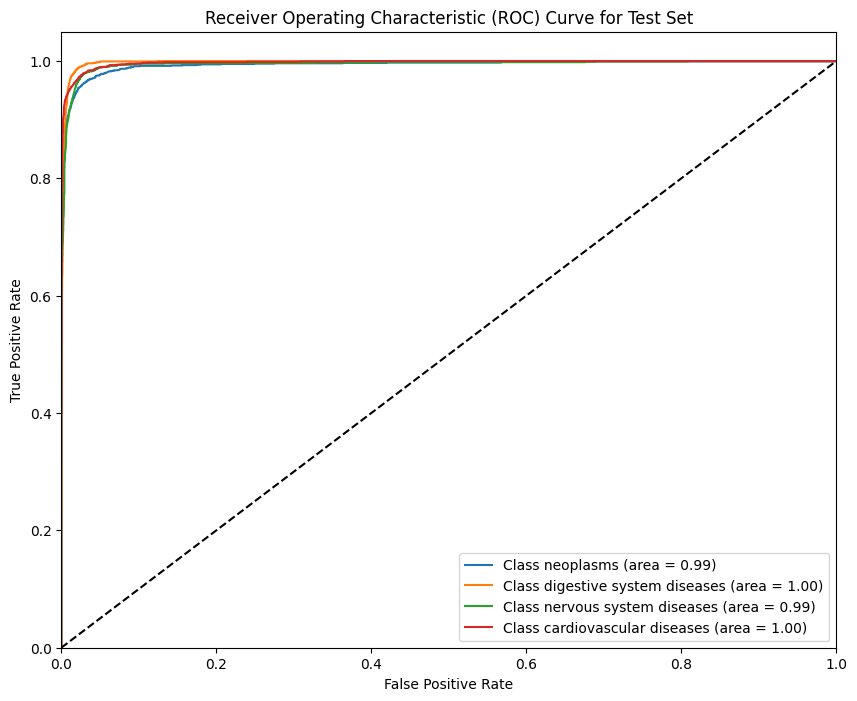

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

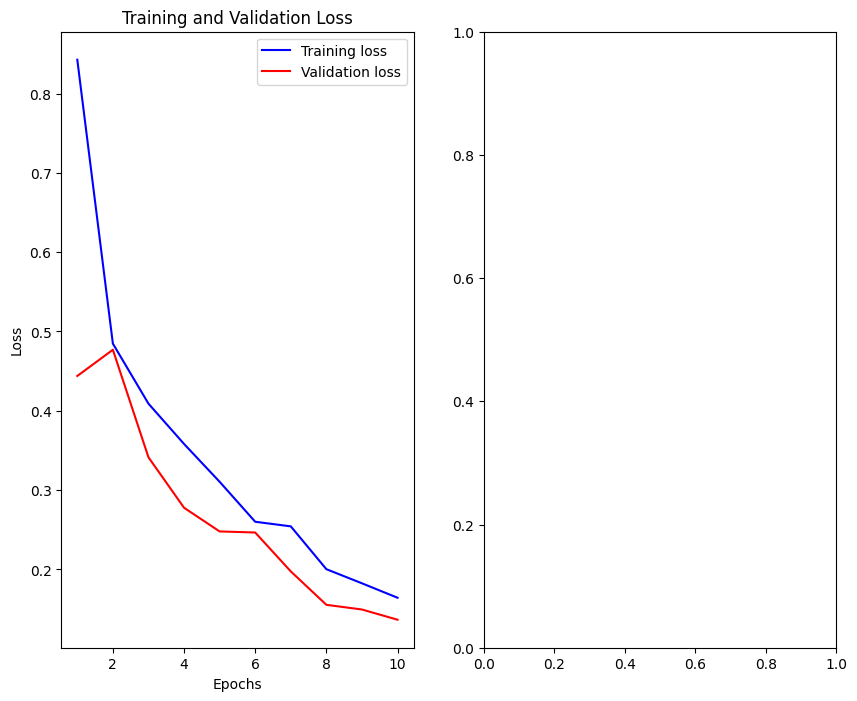

In [4]:
# Evaluate the model on the test set
test_results = trainer.predict(test_dataset)  # Use the trained model to make predictions on the test dataset
test_preds = np.argmax(test_results.predictions, axis=1)  # Get the predicted class by selecting the index of the highest score
test_labels = test_results.label_ids  # Extract the true labels from the test dataset

# Calculate precision, recall, and F1-score for the test set using weighted averaging
test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(test_labels, test_preds, average='weighted')

# Print test performance metrics
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

# Generate and display the confusion matrix for the test set
conf_matrix = confusion_matrix(test_labels, test_preds)  # Compute confusion matrix comparing true and predicted labels
plt.figure(figsize=(10, 8))  # Set plot size
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",  # Plot the matrix as a heatmap with annotations
            xticklabels=label_dict.values(), yticklabels=label_dict.values())  # Label axes with class names
plt.xlabel('Predicted Label')  # Label for x-axis
plt.ylabel('True Label')       # Label for y-axis
plt.title('Confusion Matrix for Test Set')  # Title for the plot
plt.show()

# Print detailed classification report including precision, recall, F1-score for each class
test_report = classification_report(test_labels, test_preds, target_names=label_dict.values())
print(test_report)

# ROC Curve and AUROC for test set (One-vs-Rest for each class)
fpr = {}  # False positive rate dictionary for each class
tpr = {}  # True positive rate dictionary for each class
roc_auc = {}  # Area under the ROC curve for each class

# Calculate FPR, TPR and AUC for each class
for i in range(len(label_dict)):
    fpr[i], tpr[i], _ = roc_curve(test_labels, test_results.predictions[:, i], pos_label=i)  # Compute FPR and TPR
    roc_auc[i] = auc(fpr[i], tpr[i])  # Compute Area Under Curve (AUC)

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))  # Set plot size
for i in range(len(label_dict)):
    plt.plot(fpr[i], tpr[i], label=f'Class {label_dict[i+1]} (area = {roc_auc[i]:.2f})')  # Plot ROC curve with AUC

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal baseline for random guessing
plt.xlim([0.0, 1.0])  # Limit x-axis
plt.ylim([0.0, 1.05])  # Limit y-axis
plt.xlabel('False Positive Rate')  # Label x-axis
plt.ylabel('True Positive Rate')  # Label y-axis
plt.title('Receiver Operating Characteristic (ROC) Curve for Test Set')  # Plot title
plt.legend(loc='lower right')  # Legend placement
plt.show()

# Extract training and evaluation logs for plotting
training_logs = trainer.state.log_history  # Access log history stored during training and evaluation

# Extract loss and accuracy values from the logs
train_loss_values = [log['loss'] for log in training_logs if 'loss' in log]  # Training loss values
val_loss_values = [log['eval_loss'] for log in training_logs if 'eval_loss' in log]  # Validation loss values
train_acc_values = [log['accuracy'] for log in training_logs if 'accuracy' in log]  # Training accuracy values
val_acc_values = [log['eval_accuracy'] for log in training_logs if 'eval_accuracy' in log]  # Validation accuracy values

# Ensure all metric lists are of equal length (in case logging frequency varies)
min_len = min(len(train_loss_values), len(val_loss_values))  # Find minimum length to align lists
train_loss_values = train_loss_values[:min_len]
val_loss_values = val_loss_values[:min_len]
train_acc_values = train_acc_values[:min_len]
val_acc_values = val_acc_values[:min_len]
epochs = range(1, min_len + 1)  # Define epoch range for x-axis

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 8))  # Set overall figure size

# Subplot 1: Training vs Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_values, 'b', label='Training loss')  # Plot training loss
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')  # Plot validation loss
plt.title('Training and Validation Loss')  # Subplot title
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.legend()  # Show legend

# Subplot 2: Training vs Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc_values, 'b', label='Training Accuracy')  # Plot training accuracy
plt.plot(epochs, val_acc_values, 'r', label='Validation Accuracy')  # Plot validation accuracy
plt.title('Training and Validation Accuracy')  # Subplot title
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.legend()  # Show legend

plt.show()  # Display the complete figure


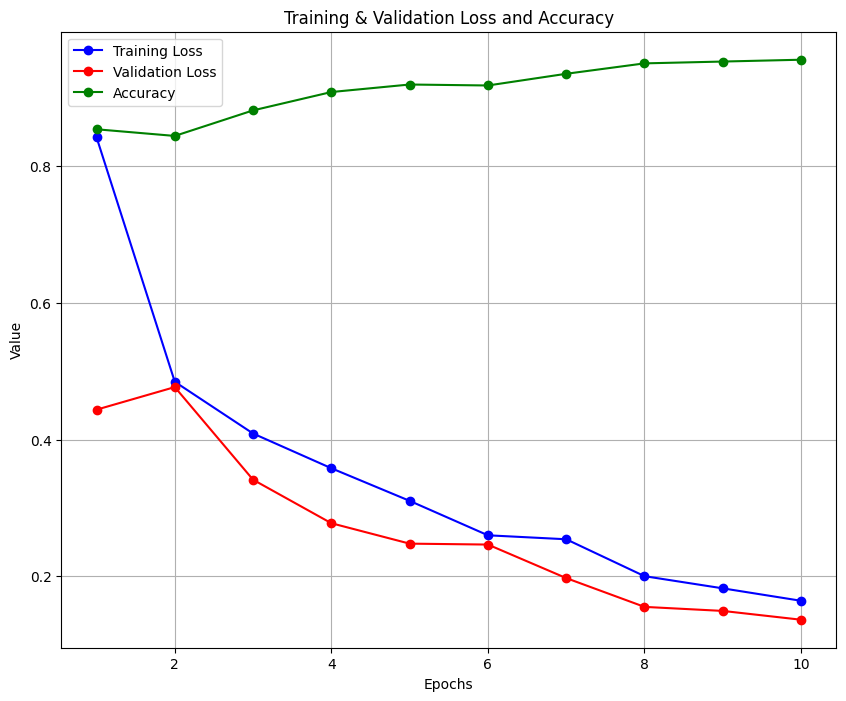

In [5]:
import matplotlib.pyplot as plt  # Import the plotting library for visualization

# Data for each epoch: training loss, validation loss, and accuracy
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Epoch numbers (x-axis)
training_loss = [0.842600, 0.484700, 0.409000, 0.358200, 0.310500, 0.260100, 0.254300, 0.200300, 0.182500, 0.164300]  # Loss during training for each epoch
validation_loss = [0.443891, 0.476940, 0.341389, 0.277765, 0.247895, 0.246551, 0.197506, 0.155381, 0.149467, 0.136590]  # Loss on validation set per epoch
accuracy = [0.854114, 0.844378, 0.881753, 0.908606, 0.919598, 0.918185, 0.935302, 0.950534, 0.953204, 0.955873]  # Model accuracy on validation set per epoch

# Set up the plot canvas with a specified figure size
plt.figure(figsize=(10, 8))  # Width = 10 inches, Height = 6 inches

# Plot training loss as a blue line with circle markers
plt.plot(epochs, training_loss, 'b-o', label='Training Loss')

# Plot validation loss as a red line with circle markers
plt.plot(epochs, validation_loss, 'r-o', label='Validation Loss')

# Plot accuracy as a green line with circle markers
plt.plot(epochs, accuracy, 'g-o', label='Accuracy')

# Set plot title and axis labels
plt.title('Training & Validation Loss and Accuracy')  # Overall plot title
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Value')  # Label for the y-axis (applies to both loss and accuracy)

# Show legend to differentiate between the plotted lines
plt.legend()

# Add gridlines for better readability of values
plt.grid(True)

# Display the final plot
plt.show()

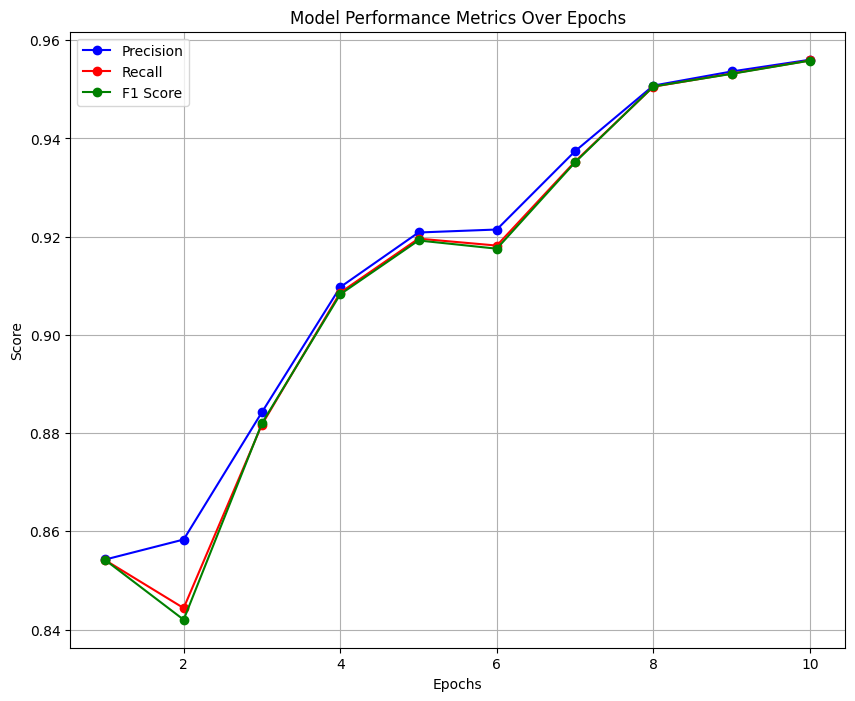

In [6]:
import matplotlib.pyplot as plt  # Import Matplotlib for plotting graphs

# Data for each epoch: precision, recall, and F1 score
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Epoch indices (x-axis values)
precision = [0.854271, 0.858336, 0.884262, 0.909720, 0.920848, 0.921454, 0.937405, 0.950753, 0.953631, 0.956025]  # Precision scores over epochs
recall = [0.854114, 0.844378, 0.881753, 0.908606, 0.919598, 0.918185, 0.935302, 0.950534, 0.953204, 0.955873]     # Recall scores over epochs
f1 = [0.854137, 0.842008, 0.882005, 0.908260, 0.919226, 0.917552, 0.935132, 0.950580, 0.953149, 0.955848]         # F1-score over epochs

# Create a new figure for plotting with specified dimensions
plt.figure(figsize=(10, 8))  # Width = 10 inches, Height = 6 inches

# Plot precision with blue line and circle markers
plt.plot(epochs, precision, 'b-o', label='Precision')

# Plot recall with red line and circle markers
plt.plot(epochs, recall, 'r-o', label='Recall')

# Plot F1-score with green line and circle markers
plt.plot(epochs, f1, 'g-o', label='F1 Score')

# Add plot title and axis labels
plt.title('Model Performance Metrics Over Epochs')  # Title of the graph
plt.xlabel('Epochs')  # X-axis label representing number of epochs
plt.ylabel('Score')   # Y-axis label representing metric values (range from 0 to 1)

# Show legend to differentiate the lines
plt.legend()

# Display gridlines to improve readability
plt.grid(True)

# Render and display the final plot
plt.show()
